#  EXPLICACIÓN GENERAL DE LA TECNOLOGÍA

Importación de las librerías a utilizar

In [1]:
import module_Cell as cell
import module_AoiGrids as gr
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline as interp

### GRÁFICAS SPOTS

Muestra de los spots de los que se parte como datos. 

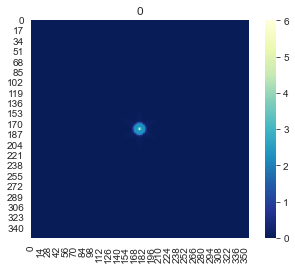

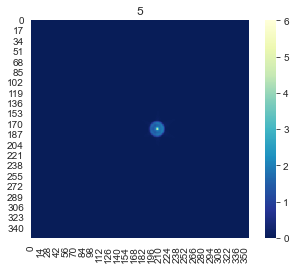

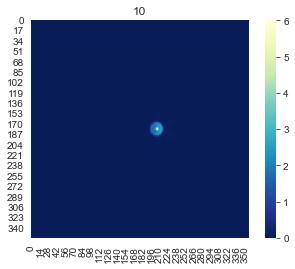

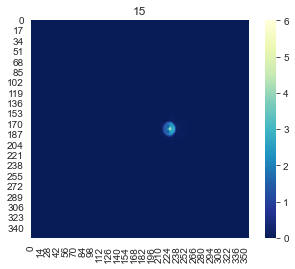

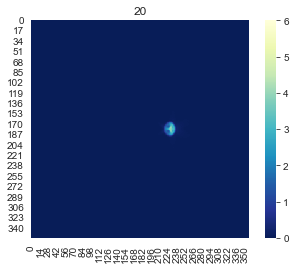

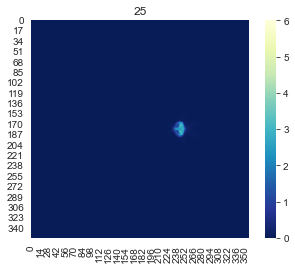

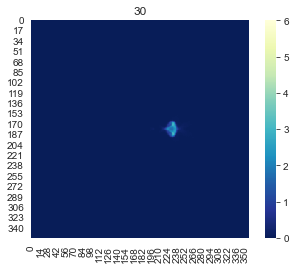

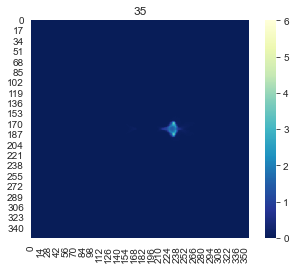

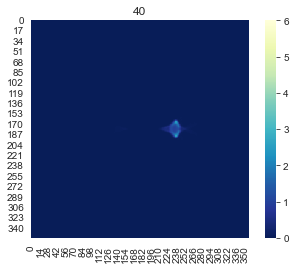

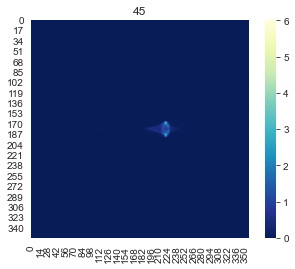

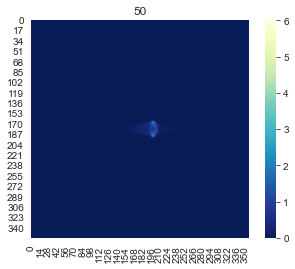

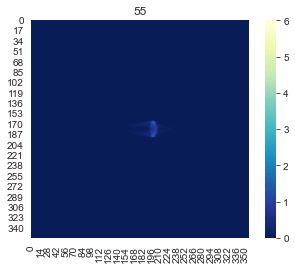

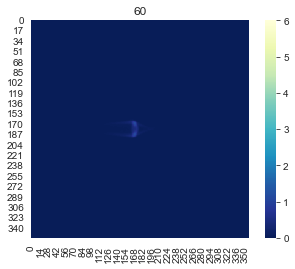

In [2]:
for i in range(0,65,5):
    gr.plot_grid(i,gr.spot_grid(i))

### DEMOSTRACIÓN CREACIÓN CELULA E INTERSECCIÓN

Demostración de la creación de la forma de la célula y del funcionamiento de la intersección asumiendo su uso para iluminación o generación fotovoltaica

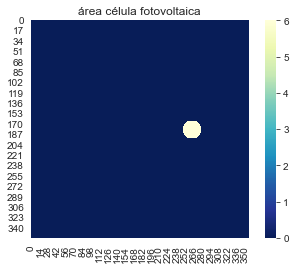

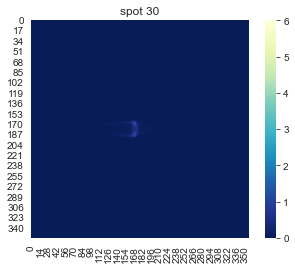

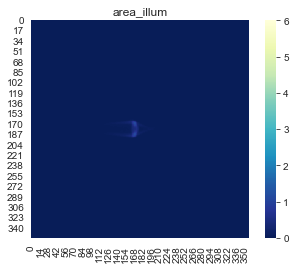

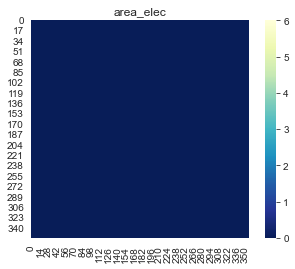

In [3]:
aoi=gr.spot_grid(60)
cell_circular_grid=cell.circular_cell(0.6, 3.4,0)
gr.plot_grid('área célula fotovoltaica',cell_circular_grid)
gr.plot_grid('spot 30',aoi)
area_illum,area_elect= cell.areas_intersection(aoi,cell_circular_grid)
gr.plot_grid('area_illum',area_illum)
gr.plot_grid('area_elec',area_elect)

### DISTRIBUCIÓN PARA CADA AOI IRRADIANCIA PARA DISTINTOS DESPLAZAMIENTOS DE CELULA

Se estudia la intersección para todo el rango de deplazamiento posible de una célula y para todos los ángulos de incidencia de los cuales se tiene valor exacto de la forma del spot.

In [4]:
caracteristics_module={    
    'tilt':0,
    'surface_azimuth':180,
    'radius':0.6,
    'area':179*10**-6
    }

In [5]:
desp=np.arange(-6,6, 0.1)
f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60=cell.function(desp,caracteristics_module['radius'])

## OPTICA Y CELULA MISMO CPV

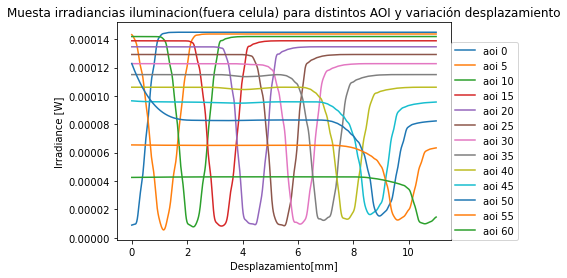

In [6]:
desp_=np.arange(0,11,0.01)
plt.plot(desp_,f_0(desp_),label='aoi 0')
plt.plot(desp_,f_5(desp_),label='aoi 5')
plt.plot(desp_,f_10(desp_),label='aoi 10')
plt.plot(desp_,f_15(desp_),label='aoi 15')
plt.plot(desp_,f_20(desp_),label='aoi 20')
plt.plot(desp_,f_25(desp_),label='aoi 25')
plt.plot(desp_,f_30(desp_),label='aoi 30')
plt.plot(desp_,f_35(desp_),label='aoi 35')
plt.plot(desp_,f_40(desp_),label='aoi 40')
plt.plot(desp_,f_45(desp_),label='aoi 45')
plt.plot(desp_,f_50(desp_),label='aoi 50')
plt.plot(desp_,f_55(desp_),label='aoi 55')
plt.plot(desp_,f_60(desp_),label='aoi 60')
plt.legend(loc=(1, 0))
plt.xlabel('Desplazamiento[mm]')
plt.ylabel('Irradiance [W]')
plt.title("Muesta irradiancias iluminacion(fuera celula) para distintos AOI y variación desplazamiento")

plt.show()

### FACTOR DE CONCENTRACIÓN

Se sabe que el spot tiene una superficie de 1mm2 para el aoi de 0º

In [7]:
fdc=f_0(desp).max()/(1*10**-6)
print("El factor de concentración es:",fdc)

El factor de concentración es: 144.93691451438863


### INTERPOLACIÓN DE DISTINTOS AOI

En este apartado se muestra una opción para trabajar con los ángulos de incidencia de los cuales no se tiene forma exacta del spot. Esta forma es interpolar las áreas y obtener la forma de cada ángulo de incidencia. 

#### RESULTADO INTERPOLACIÓN DIFERENCIALES DE AREA DEL SPOT: OBTENCIÓN DEL SPOT PARA CADA AOI

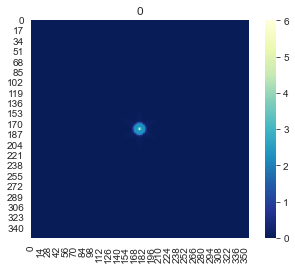

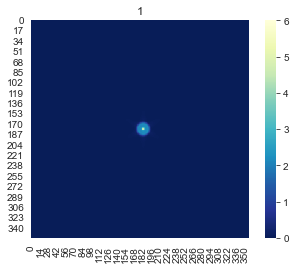

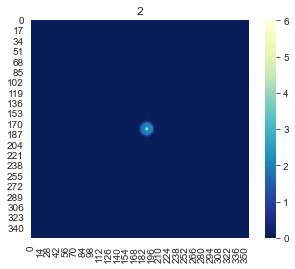

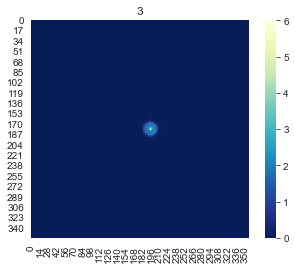

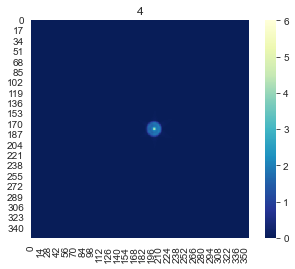

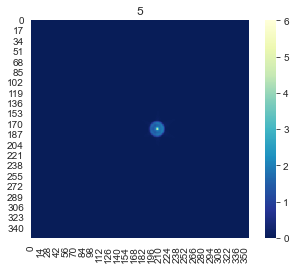

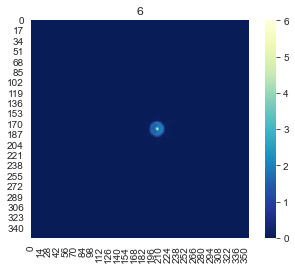

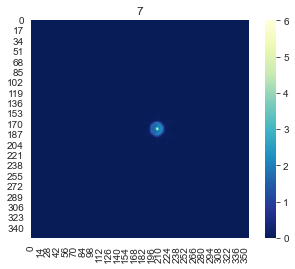

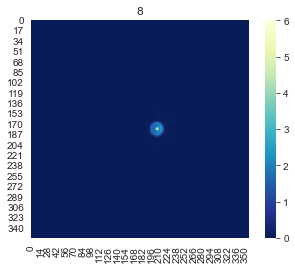

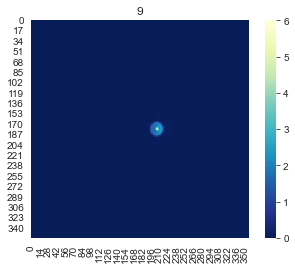

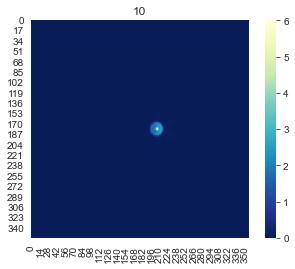

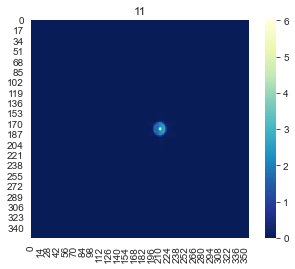

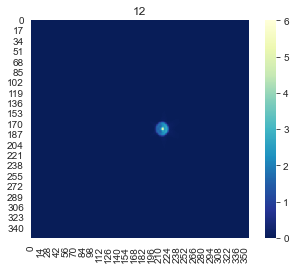

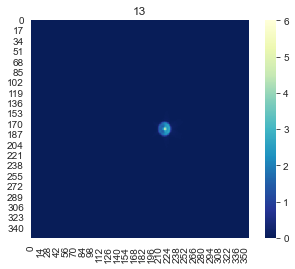

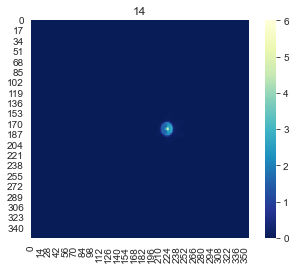

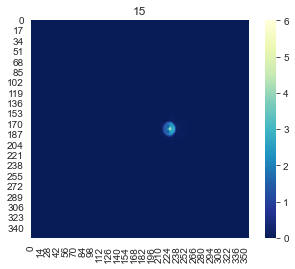

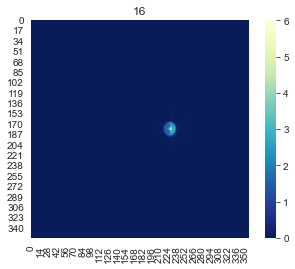

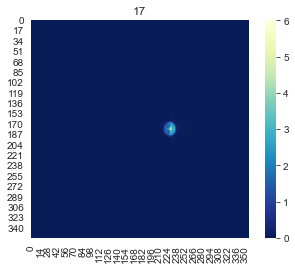

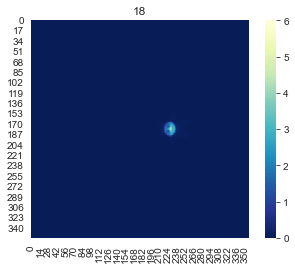

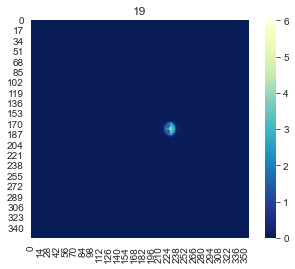

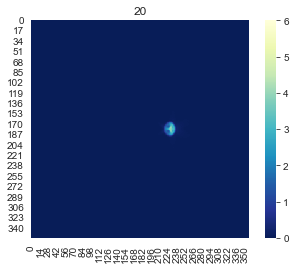

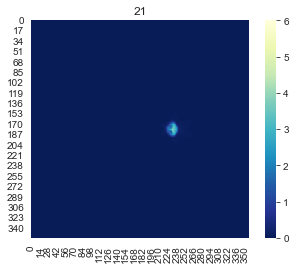

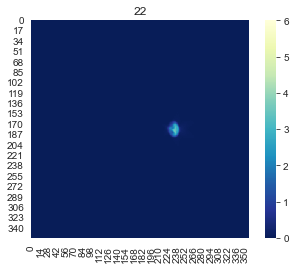

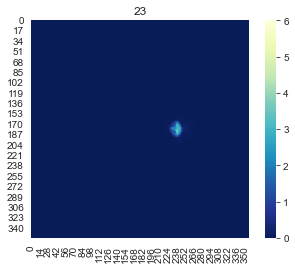

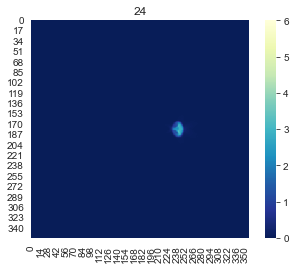

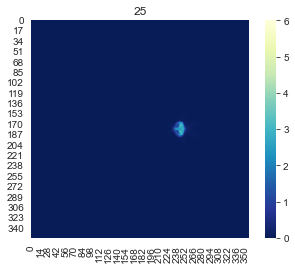

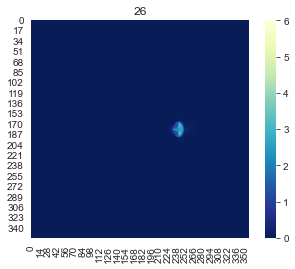

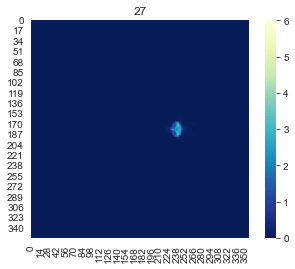

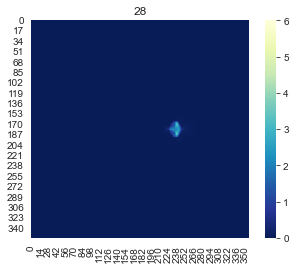

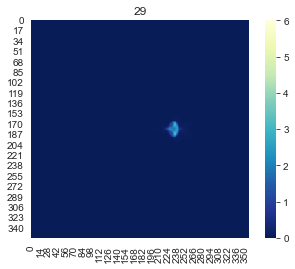

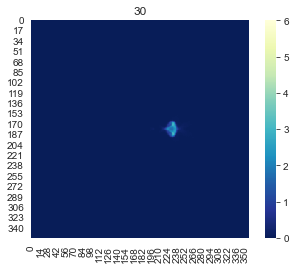

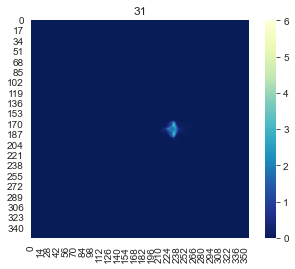

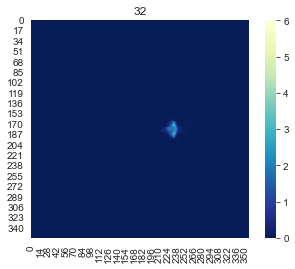

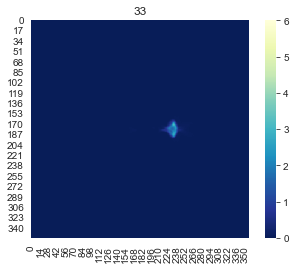

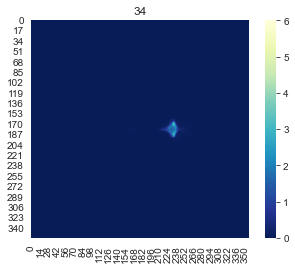

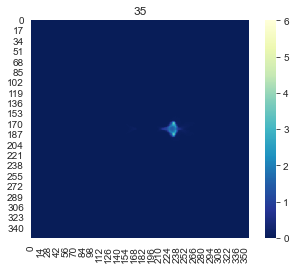

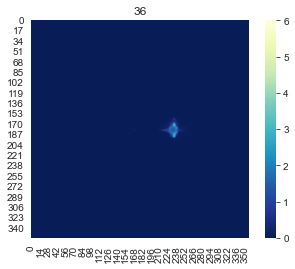

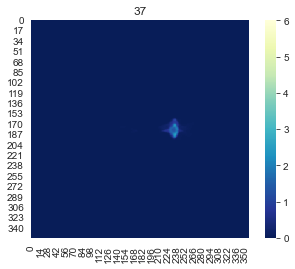

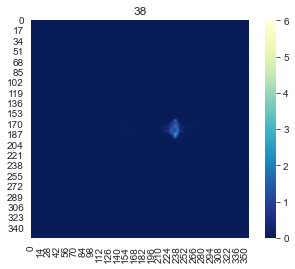

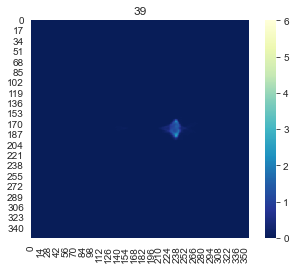

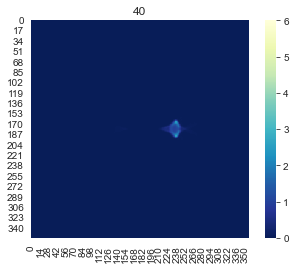

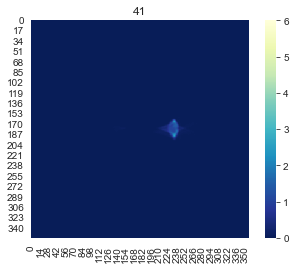

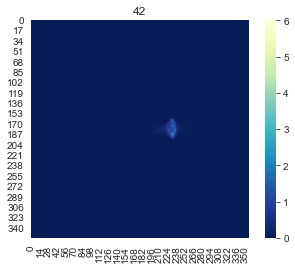

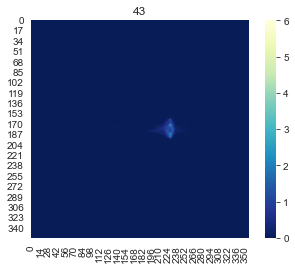

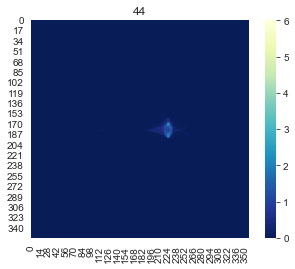

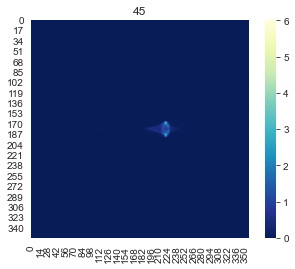

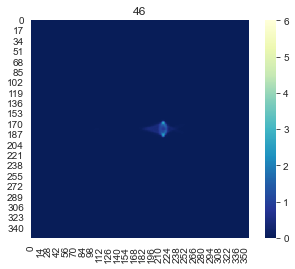

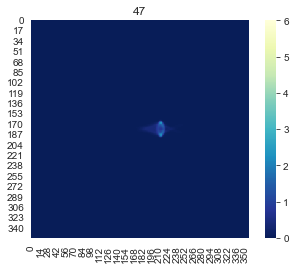

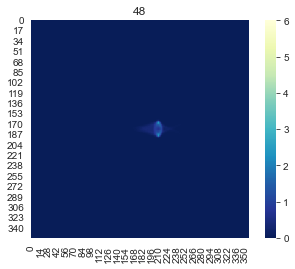

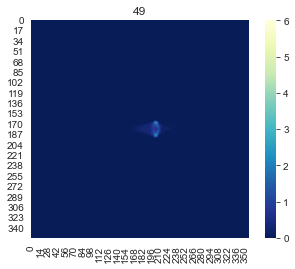

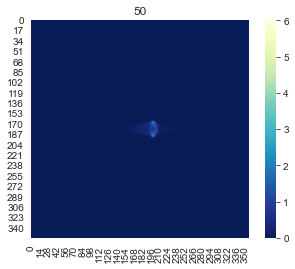

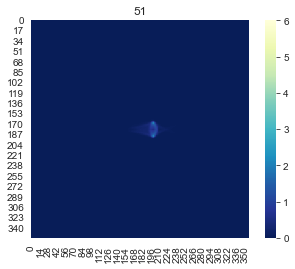

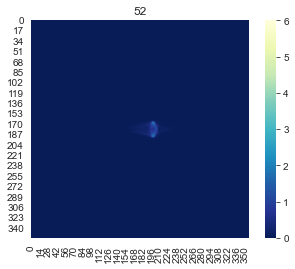

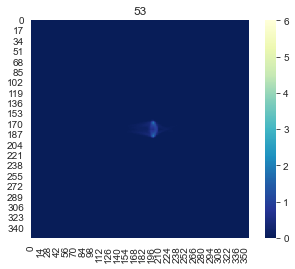

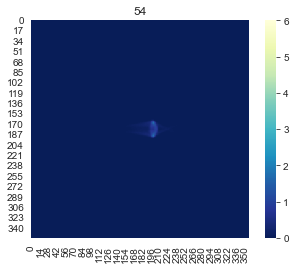

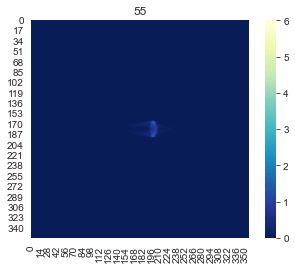

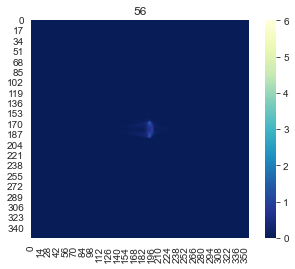

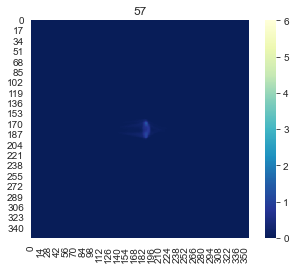

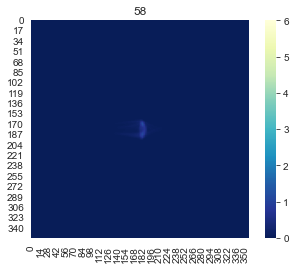

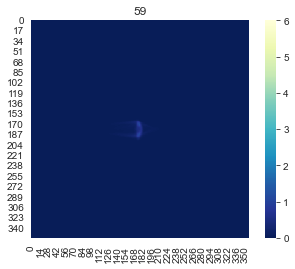

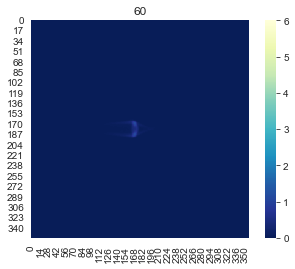

In [8]:
for i in range(0,61,1):
    aoi=gr.spot_grid(i)
    gr.plot_grid(i,aoi)

Para trabajar con ellos bastaría hacer lo mismo que se ha hecho con los spots que se conocían. Vamos a ejemplificar el caso de 12º y 47º de ángulo de incidencia, para comprobar el método

In [9]:
irradiance_aoi_12=[]
irradiance_aoi_47=[]
for i in desp:
    irradiance_aoi_12.append(cell.irradiance_cell(caracteristics_module['radius'], i, 0, 12))
    irradiance_aoi_47.append(cell.irradiance_cell(caracteristics_module['radius'], i, 0, 47))



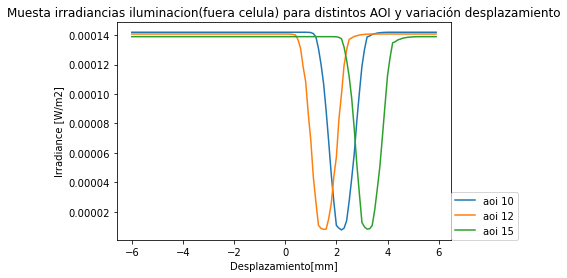

In [10]:
plt.plot(desp,f_10(desp),label='aoi 10')
plt.plot(desp,irradiance_aoi_12,label='aoi 12')
plt.plot(desp,f_15(desp),label='aoi 15')
plt.legend(loc=(1, 0))
plt.xlabel('Desplazamiento[mm]')
plt.ylabel('Irradiance [W/m2]')
plt.title("Muesta irradiancias iluminacion(fuera celula) para distintos AOI y variación desplazamiento")

plt.show()

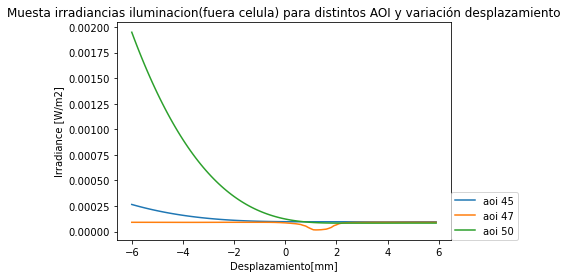

In [11]:
plt.plot(desp,f_45(desp),label='aoi 45')
plt.plot(desp,irradiance_aoi_47,label='aoi 47')
plt.plot(desp,f_50(desp),label='aoi 50')
plt.legend(loc=(1, 0))
plt.xlabel('Desplazamiento[mm]')
plt.ylabel('Irradiance [W/m2]')
plt.title("Muesta irradiancias iluminacion(fuera celula) para distintos AOI y variación desplazamiento")

plt.show()